<a href="https://colab.research.google.com/github/HanJaeHui-GitHub/ESAA/blob/main/ESAA_YB_Week06_markdown(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6주차 과제_1007(월)

파이썬 머신러닝 완벽가이드 ch4. 3\~6 p.210\~244

## **앙상블 학습**

### **앙상블 학습 개요**

앙상블 학습(Ensemble Learning)을 통한 분류는 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최족 예측을 도출하는 기법

목표 : 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측값을 얻는 것

비정형 데이터(이미지, 영상, 음성 등) → 딥러닝 / 정형 데이터 → 앙상블이 뛰어난 성능을 나타냄

<<앙상블 알고리즘>>

- 랜덤 포레스트

- 그래디언트 부스팅

- XGBoost

- LightGBM

- 스태킹(Stacking)

<<앙상블 학습 유형>>

- 보팅(Voting) : 여러 개의 분류기가 투표를 통해 최종 예측 결과 결정, 서로 다른 알고리즘을 가진 분류기가 결합

- 배깅(Bagging) : 여러 개의 분류기가 투표를 통해 최종 예측 결과 결정, 같은 유형의 알고리즘 기반이지만 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행, 교차 검증이 중첩을 허용하지 않는 것과 다르게 배깅 방식은 중첩 허용

    ex) 랜덤 포레스트 알고리즘

---
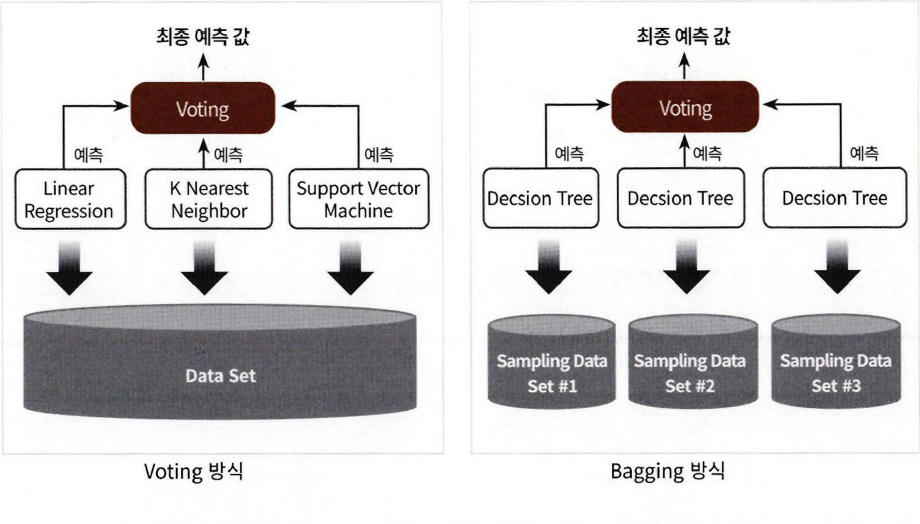

← 보팅 분류기

3개의 ML 알고리즘이 같은 데이터 세트에 대해 학습하고 예측한 결과를 가지고 보팅을 통해 최종 예측 결과 선정

배깅 분류기 →

단일 ML 알고리즘으로 여러 분류기가 학습으로 개별 예측함. 개별 분류기에 할당된 학습 데이터는 원본 학습 데이터를 샘플링해 추출

부트스트래핑(Bootstrapping) 분할 방식 : 개별 Classifier에게 데이터를 샘플링해서 추출하는 방식

배깅 앙상블 방식 : 개별 분류기가 부트스트래핑 방식으로 샘플링된 데이터 세트에 대해서 학습을 통해 개별적인 예측을 수행한 결과를 보팅을 통해 최종 예측 결과를 선정하는 방식

---

- 부스팅(Boosting) : 여려 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기는 가중치(weight)를 부여하면서 학습과 예측 진행, 예측 성능이 뛰어나 앙상블 학습 주도함 ex) 대표적인 부스팅 모듈 : 그래디언트 부스트, XGBoost(eXtra Gradient Boost), LightGBM(Light Gradient Boost)

- 이 외의 스태킹을 포함한 다양한 방법

    스태킹 : 여러 가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방법


### **보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)**

- **하드 보팅**을 이용한 분류(Classification)

    다수결 원칙과 비슷

    예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정하는 것

- **소프트 보팅** 을 이용한 분류(Classification)

    분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정

### **보팅 분류기(Voting Classifier)**

In [ ]:
# 보팅 방식의 앙상블을 이용해 위스콘신 유방암 데이터 세트 예측 분석하기
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn. metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
# 개별 모델은 로지스틱 회귀와 KNN
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도 : 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


보팅 분류기가 정확도가 조금 높게 나타났는데 보팅으로 여러 개의 기반 분류기를 결합한다고 무조건 기반 분류기보다 예측 성능이 향상되는 것은 아님

## **랜덤 포레스트**

### **랜덤 포레스트의 개요 및 실습**

- **랜덤 포레스트** : 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘인 배깅(Bagging)의 대표적인 알고리즘

    앙상블 알고리즘 중 비교적 빠른 수행 속도, 다양한 영역에서 높은 예측 성능을 보임

    랜덤 포레스트의 기반 알고리즘 = 결정 트리

    여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정

    개별 트리는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세츠를 학습함.

    ↪ 여러 개의 데이터 세트를 중첩되게 분리하는 것 = 부트스트래핑(bootstrapping)

    랜덤 포레스트의 서브세트(Subset)의 데이터 건수는 전체 데이터 건수와 동일하지만 개별 데이터가 중첩되어 만들어짐

In [ ]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [ ]:
import pandas as pd

def get_human_dataset( ):

    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('/content/drive/MyDrive/ESSA/데이터/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('/content/drive/MyDrive/ESSA/데이터/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('/content/drive/MyDrive/ESSA/데이터/X_test.txt',sep='\s+', names=feature_name)

    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('/content/drive/MyDrive/ESSA/데이터/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/ESSA/데이터/y_test.txt',sep='\s+',header=None,names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

<ipython-input-3-92110e44b328>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[1] >0 else x[0] ,  axis=1)
<ipython-input-3-92110e44b328>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()를 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도:{0:.4f}'.format(accuracy))

랜덤 포레스트 정확도:0.9196


### **랜덤 포레스트 하이퍼 파라미터 및 튜닝**

트리 기반의 앙상블 알고리즘의 단점  : 하이퍼 파라미터가 너무 많고 그로 인해 튜닝을 위한 시간이 많이 소모됨, 그럼에도 튜닝 후 예측 성능이 크게 향상되는 경우가 많지 않음

<랜덤 포레스트의 하이퍼 파라미터>

- n_estimator : 랜덤 포레스트에서 결정 트리의 개수를 지정해줌 , 디폴트 = 10개, 많이 설정할 수록 좋은 성능을 기대할 수 있지만 계속 증가시킨다고 성능이 무조건 향상되는 것은 아님, 늘릴수록 학습 수행 시간이 오래 걸림

- max_features : 결정 트리에 사용된 max_features 파라미터와 같음, 그러나 랜덤 포레스트의 트리를 분할하는 피처를 참조할 때 전체 피처가 아닌 sqrt(전체 피처 개수)만큼 참조함 (ex. 전체 피처가 16개라면 4개 참조)

- max_depth, min_samples_leaf, min_samples_split와 같이 결정 트리에서 과적합을 개선하기 위해 사용되는 파라미터를 똑같이 적용 가능함

In [ ]:
# GridSearchCV를 이용해 랜덤 포레스트의 하이퍼 파라미터 튜닝하기
# 튜닝 시간을 절약하기 위해 n_estimators = 100, CV = 2로 설정하여 최적 하이퍼 파라미터 구하기
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [8, 16, 24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도:0.9165


In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators=100, min_samples_leaf=6, max_depth=16,
                                 min_samples_split=2, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도:0.9260


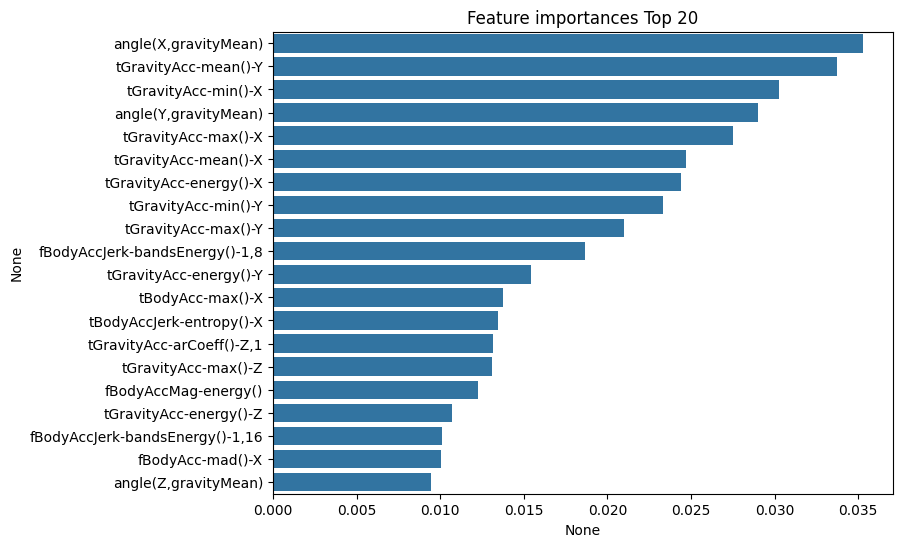

In [ ]:
# 피처 중요도를 막대그래프로 시각화해보기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## **GBM(Gradient Boosting Machine)**

### **GBM의 개요 및 실습**

부스팅 알고리즘은 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식

- **AdaBoost(Adaptive boosting)** : 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘
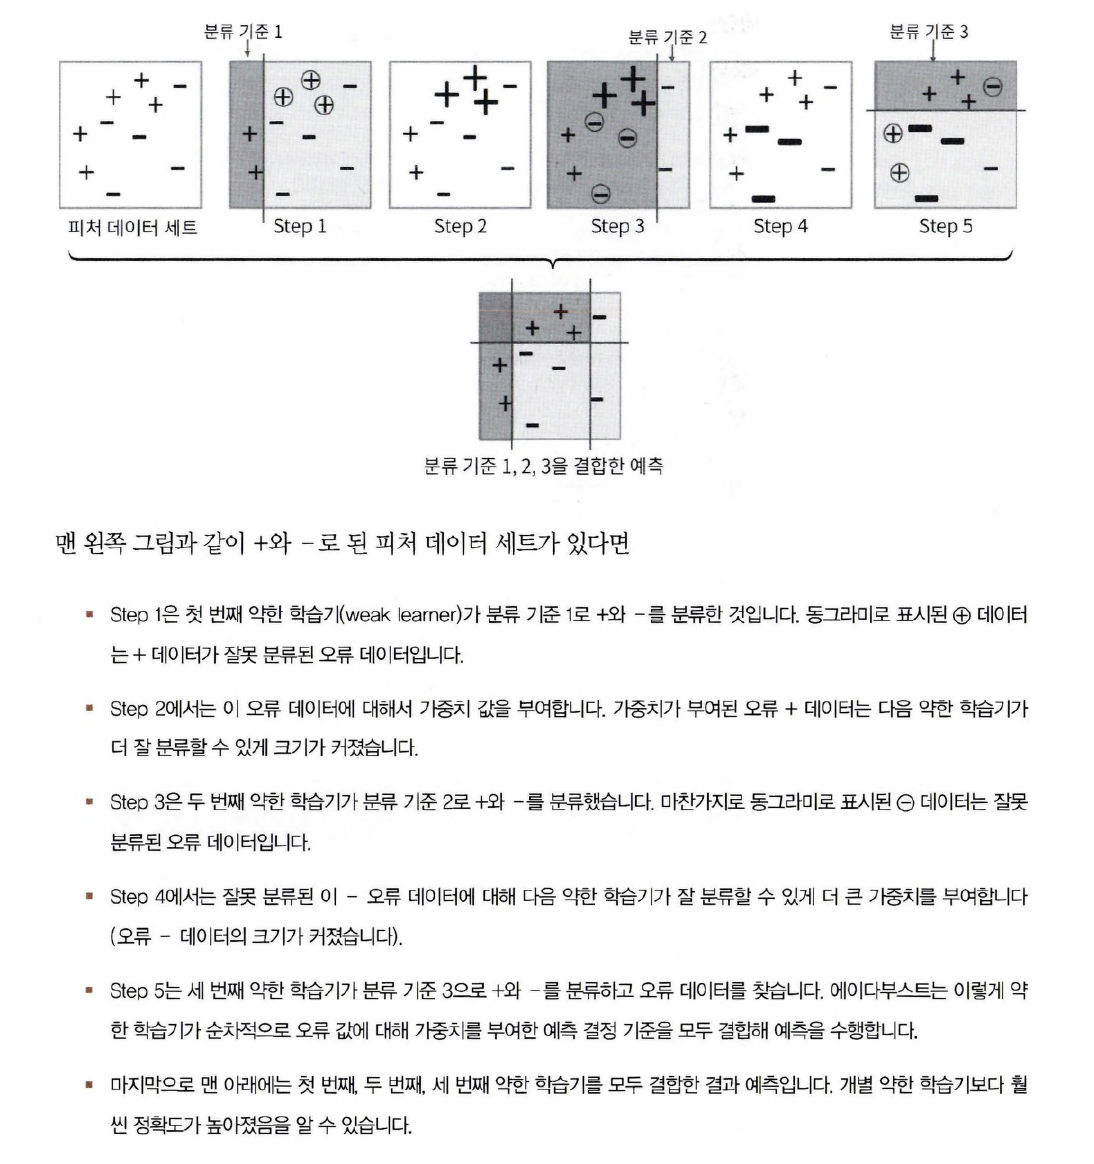

- **그래디언트 부스트** : 에이다부스트와 유사하나 가중치 업데이트를 경사 하강법(Gradient Descent)을 이용하는 것이 큰 차이임

    오류 값 = 실제 값 - 예측값

    분류의 실제 결괏값 = y , 피처 =
$x_1, x_2, ⋯, x_n$ , 피처에 기반한 예측 함수 =
$F(x)$이라고 하면 오류식 $h(x)=y-F(x)$이다.

    이 오류식을 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트라는 것이 **경사하강법(Gradient Descent)**



In [ ]:
# GBM을 이용해 사용자 행동 데이터 세트를 예측 분류하고 수행 시간 측정하기
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도:{0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간:{0:.1f}'.format(time.time() - start_time))

GBM 정확도:0.9386
GBM 수행 시간:1446.8


일반적으로 GBM이 랜덤 포레스트보다 예측 성능이 조금 뛰어난 경우가 많다.

그러나 수행 시간이 오래 걸리고 하이퍼 파라미터 튜닝 노력도 더 필요하다.

### **GBM 하이퍼 파라미터 소개**

n_estimators, max_depth, max_features 생략

- loss : 경사 하강법에서 사용할 비용 함수 지정, 특별한 이유가 없으면 기본값인 'deviance' 그대로 적용

- learning_rate : GBM이 학습을 진핼할 때마다 적용하는 학습률, Weak learner가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수, 0~1 사이의 값을 지정할 수 있으며 기본값은 0.1

    <너무 작은 값 적용시>

    업데이트 되는 값이 작아져서 최소 오류 값을 찾아 예측 성능이 높아질 가능성이 높음

    그러나 많은 weak learner는 순차적인 반복이 필요해서 수행 시간이 오래 걸리고 반복이 완료돼도 최소 오류 값을 찾지 못할 수 있다.

    <너무 큰 값 적용시>

    최소 오류 값을 찾지 못하고 그냥 지나쳐 버려 예측 성능이 떨어질 가능성이 높음

    빠른 수행 가능

    이러한 특성 때문에 n_estimators와 상호 보완적으로 조합해 사용함

- subsample : weak learner가 학습에 사용하는 데이터의 샘플링 비율, 기본값은 1이며 이는 전체 학습 데이터를 기반으로 학습한다는 것을 의미함, 과적합이 염려되는 경우 subsample을 1보다 작은 값으로 설정

## **XGBoost(eXtra Gradient Boost)**

### **XGBoost 개요**

트리 기반 앙상블 학습에서 가장 각광 받고 있는 알고리즘 중 하나

<주요 장점>

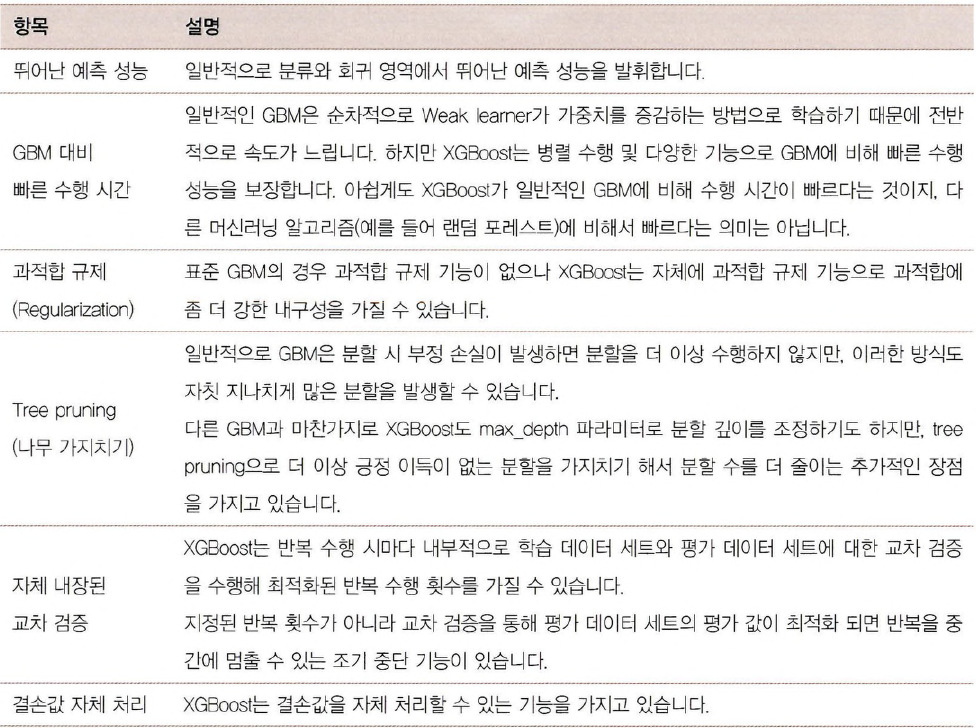

### **XGBoost 설치하기**

In [ ]:
pip install xgboost==1.5.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.5/173.5 MB 7.5 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.1
    Uninstalling xgboost-2.1.1:
      Successfully uninstalled xgboost-2.1.1


In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

### **파이썬 래퍼 XGBoost 하이퍼 파라미터**

<**주요 일반 파라미터**>

일반적으로 실행 시 스레드의 개수나 slient 모드 등의 선택을 위한 파라미터로서 디폴트 파라미터 값을 바꾸는 경우는 거의 없음

- booster : gbtree(tree based model) 또는 gblinear(linear model) 선택, 디폴트는 gbtree
- silent : 디폴트는 0, 출력 메시지를 나타내고 싶지 않을 경우 1로 설정
-nthread : CPU의 실행 스레드 개수를 조정, 디폴트는 CPU의 전체 스레드를 다 사용하는 것, 멀티 코어/스레드 CPU 시스템에서 전체 CPU를 사용하지 않고 일부 CPU만 사용해 ML 애플리케이션을 구동하는 경우에 변경

<**주요 부스터 파라미터**>

트리 최적화. 부스팅, regularization 등과 관련 파라미터 등을 지칭함

- eta[default=0.3, alias:learning_rate]  : GBM의 학습률(learning rate)과 같은 파라미터, 0\~1 값을 지정하며 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값, 파이썬 래퍼 xgboost를 이용할 경우 디폴트는 0.3, 사이킷런 래퍼 클래스를 이용할 경우 eta는 learning_rate 파라미터로 대체되며, 디폴트는 0.1, 보통은 0.01~0.2 사이의 값을 선호
- num_boost_rounds : GBM의 n_estimators와 같은 파라미터
- min_child_weight[default=1] : 트리에서 추가적으로 가지를 나눌지를 결정하기 위해 필요한 데이터들의 weight 총합. 값이 클수록 분할 자제, 과적합을 조절하기 위해 사용
- gamma[default=0, alias:min_split_loss] : 트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값, 해당 값보다 큰 손실이 감소된 경우에 리프 노드를 분리, 값이 클수록 과적합 감소 효과
- max_depth[default=6] : 트리 기반 알고리즘의 max_depth와 같음, 0을 지정하면 깊이에 제한 없음, 값이 높을면 특정 피처 조건에 특화되어 룰 조건이 만들어지므로 과적합 가능성이 높아지며 보통은 3~10 사이의 값을 적용함
- sub_sample[default=1] : GBM의 subsample과 동일, 트리가 커져서 과적합되는 것을 제어하기 위해 데이터를 샘플링하는 비율 지정, sub_sample=0.5로 지정하면 전체 데이터의 절반을 트리를 생성하는데 사용, 일반적으로 0.5~1 사이의 값 사용
- colsample_bytree[default=1] : GBM의 max_features와 유사, 트리 생성에 필요한 피처(칼럼)를 임의로 샘플링하는데 사용, 매우 많은 피처가 잇는 경우 과적합 조정하는데 사용됨
- lambda[default=1, alias:reg_lambda] : L2 Regularization 적용 값, 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있음
- alpha[default=0, alias:reg_alpha] : L1 Regularization 적용 값, 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과 있음
- scale_pos_weight[default=1] : 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터

<**학습 태스크 파라미터**>

학습 수행 시의 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터

- objective : 최솟값을 가져야 할 손실 함수를 정의, XGBoost는 많은 유형의 손실함수를 사용할 수 있음, 주로 사용되는 손실함수는 이진 분류인지 다중 분류인지에 따라 다름

    ↪ binary:logistic : 이진 분류일 때 적용
    
    ↪ multi:softmax : 다중 분류일 때 적용, 레이블 클래스의 개수인 num_class 파라미터를 지정해야 함

    ↪ multi:softprob : multi:softmax와 유사하나 개별 레이블 클래스의 해당되는 예측 확률을 반환함

- eval_metric : 검증에 사용되는 함수 정의, 기본값은 회귀인 경우 mse, 분류일 경우 error

    * mse : Root Mead Square Error
    * mae : Mean Absolute Error
    * logloss : Negative log-likelihood
    * error : Binary classification error rate(0.5 threshold)
    * merror : Multiclass classification error rate
    * mlogloss : Multiclass logloss
    * auc : Area under the curve


과적합 문제가 심각하다면

→ eta 값 낮추고 num_round(또는 n_estimators) 높이기 / max_depth 값 낮추기 / min_child_weight 값 높이기 / gamma 값 높이기 / subsample과 colsample_bytree 조정하기

In [ ]:
import xgboost
print(xgboost.__version__)

1.5.0


### **파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측**

In [ ]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target
cancer_df = pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target'] = labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [ ]:
# 타깃 레이블 값의 종류는 악성인 'malignant'가 0, 양성인 'benign'이 1임
# 레이블 값의 분포 확인하기
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


In [ ]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Lable임 Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [ ]:
# 만약 구버전 XGBoost에서 DataFrame으로 DMatrix 생성이 안될 경우 X_train.values로 넘파이 변환.
# 학습, 검증, 테스트용 DMatrix를 생성.
dtr = xgb.DMatrix(data=X_tr.values, label=y_tr.values)
dval = xgb.DMatrix(data=X_val.values, label=y_val.values)
dtest = xgb.DMatrix(data=X_test.values, label=y_test.values)

In [ ]:
params = {'max_depth':3,
          'eta':0.05,
          'objective':'binary:logistic',
          'eval_metric':'logloss'
          }
num_rounds = 400

In [ ]:
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval'로 명기함
eval_list = [(dtr, 'train'),(dval, 'eval')] # 또는 eval_list = [(dval, 'eval')]만 명기해도 무방

# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtr, num_boost_round = num_rounds, early_stopping_rounds = 50, evals = eval_list)

[0]	train-logloss:0.65016	eval-logloss:0.66183
[1]	train-logloss:0.61131	eval-logloss:0.63609
[2]	train-logloss:0.57563	eval-logloss:0.61144
[3]	train-logloss:0.54310	eval-logloss:0.59204
[4]	train-logloss:0.51323	eval-logloss:0.57329
[5]	train-logloss:0.48447	eval-logloss:0.55037
[6]	train-logloss:0.45796	eval-logloss:0.52929
[7]	train-logloss:0.43436	eval-logloss:0.51534
[8]	train-logloss:0.41150	eval-logloss:0.49718
[9]	train-logloss:0.39027	eval-logloss:0.48154
[10]	train-logloss:0.37128	eval-logloss:0.46990
[11]	train-logloss:0.35254	eval-logloss:0.45474
[12]	train-logloss:0.33528	eval-logloss:0.44229
[13]	train-logloss:0.31893	eval-logloss:0.42961
[14]	train-logloss:0.30439	eval-logloss:0.42065
[15]	train-logloss:0.29000	eval-logloss:0.40958
[16]	train-logloss:0.27651	eval-logloss:0.39887
[17]	train-logloss:0.26389	eval-logloss:0.39050
[18]	train-logloss:0.25210	eval-logloss:0.38254
[19]	train-logloss:0.24123	eval-logloss:0.37393
[20]	train-logloss:0.23076	eval-logloss:0.36789
[2

train()으로 학습으로 수행하면서 반복 시마다 train-logloss와 eval-logloss가 지속적으로 감소함

num_voost_roundfmf 400회로 설정했음에도 불구하고 400번을 반복하지 않고 0부터 176번째에서 반복 완료 → 126번째에서 eval-logloss 값이 0.25587로 가장 낮고 이후 126번에서 176번까지 early_stopping_rounds로 지정된 50회 동안 향상되지 않았기 때문에(logloss가 작을수록 좋은 성능) 반복을 멈춤

In [ ]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 List 객체인 prebs에 저장
preds = [1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시', preds[:10])

predict() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨
[0.845 0.008 0.68  0.081 0.975 0.999 0.998 0.998 0.996 0.001]
예측값 10개만 표시 [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
# 예측 성능 평가
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740,    F1: 0.9677, AUC:0.9937


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

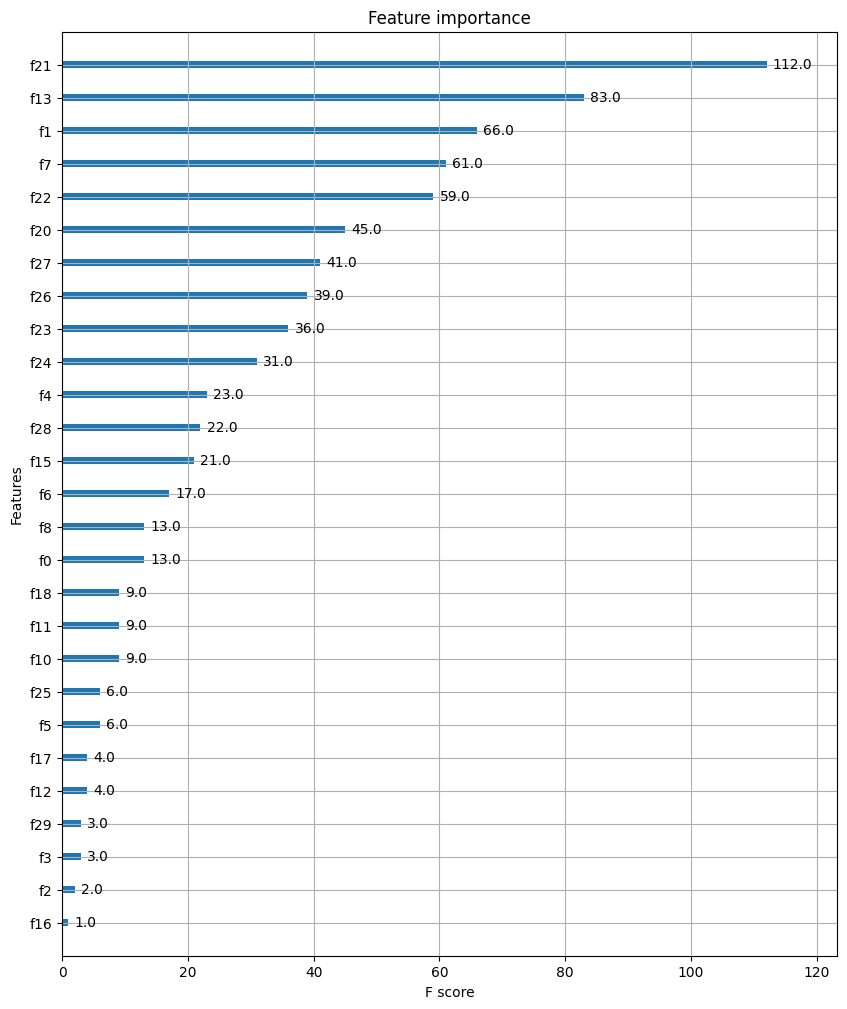

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

### **사이킷런 래퍼 XGBoost의 개요 및 적용**

In [ ]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

# Warning 메시지를 없애기 위해 eval_metrics 값을 XGBClassifier 생성 인자로 입력
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metric='logloss')
xgb_wrapper.fit(X_train.values, y_train.values, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

In [ ]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9954


In [ ]:
from xgboost import XGBClassifier
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
evals = [(X_tr.values, y_tr.values), (X_val.values, y_val.values)]
xgb_wrapper.fit(X_tr.values, y_tr.values, early_stopping_rounds=50, eval_metric='logloss', eval_set=evals, verbose=True)
ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52929
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31893	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

In [ ]:
get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740,    F1: 0.9677, AUC:0.9933


In [ ]:
# early_stopping_rounds를 10으로 설정하고 재학습
xgb_wrapper.fit(X_tr.values, y_tr.values, early_stopping_rounds=10, eval_metric='logloss', eval_set=evals, verbose=True)
ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52929
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31893	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

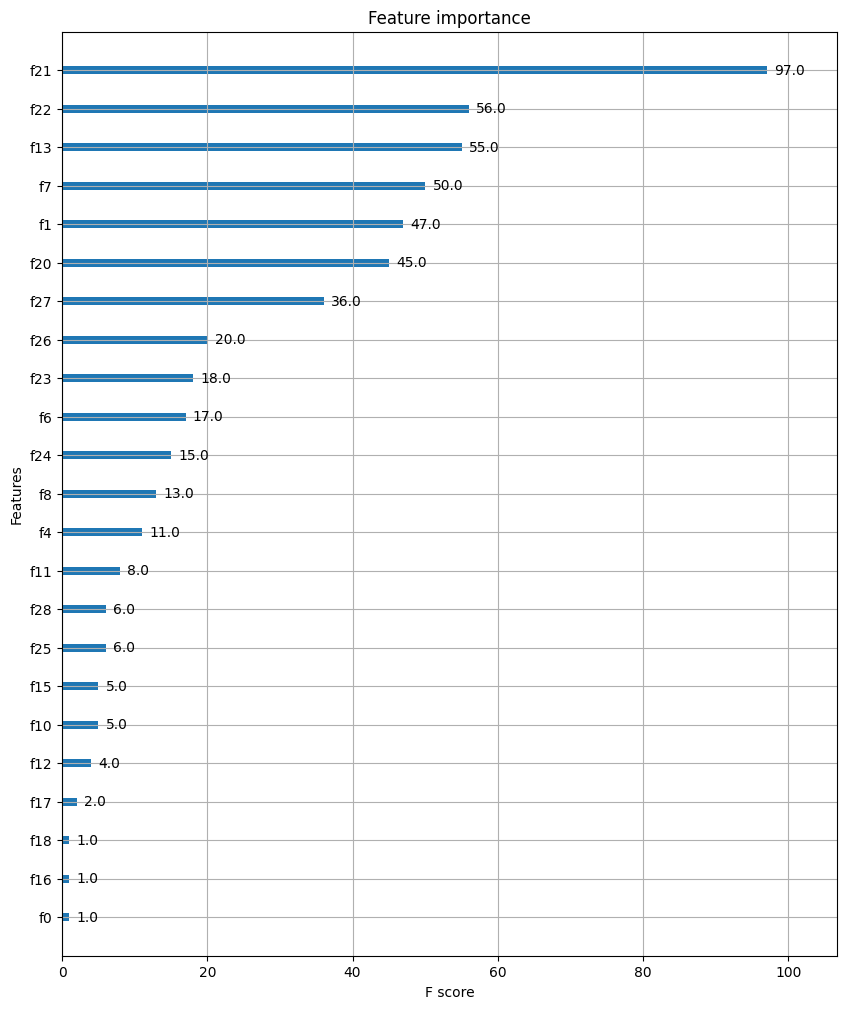

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방
plot_importance(xgb_wrapper, ax=ax)